In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
#reading csv file 
data = pd.read_csv('churn_prediction.csv')

In [11]:
#first look at the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [12]:
#getting the shape of data
data.shape

(28382, 21)

In [13]:
#features in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [14]:
#getting the data types for each feature
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

# **2  Age of Customers**

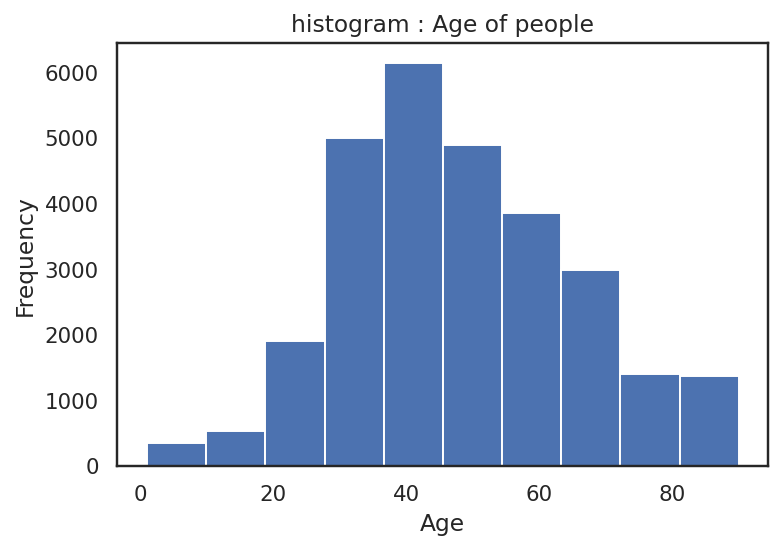

In [15]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of people")
plt.show()

A Histogram visualises the distribution of data over a continuous interval.

Each bar in a histogram represents the tabulated frequency at each interval/bin.

In simple words height (y-axis) represents the frequency for respective bin (interval)

Most Cusotmers lie in the age between 40-50

In [17]:
# calculating points of standard deviation
age = data['age']
a_mean = age.mean()
a_median = age.median()
a_stdev = age.mean()- age.std(), age.mean()+ age.std() 

# checking
a_mean, a_median, a_stdev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

Mean value of age is 48.208336269466564

Median value for age is 46.0

Spread for first standard deviation is (30.40117289650014, 66.01549964243299)

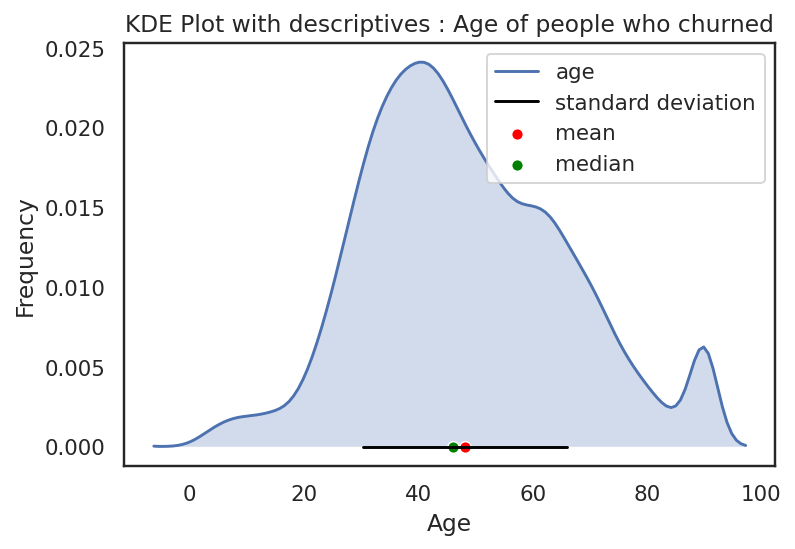

In [18]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(age, shade = True)
sns.scatterplot( [a_mean], [0], color='red', label='mean')
sns.scatterplot( [a_median], [0], color='green', label='median')

sns.lineplot( a_stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

KDE indicates that age of Customers follow a distribution which is similar to Normal Distribution

Suprisingly there are more than expected Older customers in our dataset

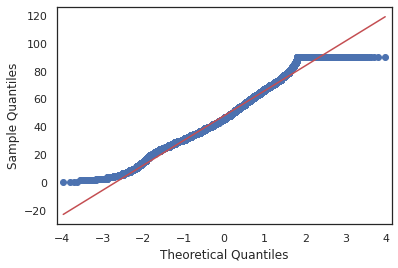

In [19]:
#qq plot explain
sm.qqplot(age, line='s') 
py.show() 

Larger values are not as large/extreme as expected from a Normal Distribution

Smaller values are not as smaller/extreme as expected from a Normal Distribution

In [20]:
data['age'].skew()

0.33058929557517264

Skewness is around 0.33

Age of Cusotmers follows a Normal like Distribution

In [21]:
data['age'].kurtosis()

-0.16866785691275865

Kurtosis Value is also close to Zero.

This means tails are not as dense as compared to Normal Distribution.

There are less values available along the tails.

# **3  Vintage**

In [22]:
# calculating measures
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()


# checking
v_mean, v_median, v_mode

(2091.1441054189277, 2154.0, 0    2251
 1    2260
 dtype: int64)

Mean value of vintage is 2091.1441054189277

Median value for vintage is 2154.0

Mode value for vintage is 2251 and 2260. Both of them have same frquency

In [23]:
print(data[data['vintage']==2251].shape[0])
print(data[data['vintage']==2260].shape[0])


69
69


The frequency for 2251 and 2260 is 69

Both of them qualify to be the mode value (most frequent value) for the dataset.

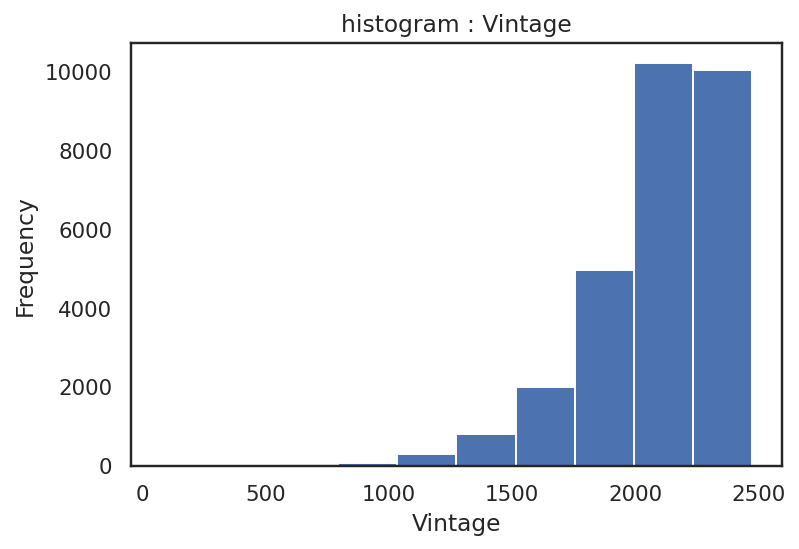

In [24]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(data['vintage'])
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("histogram : Vintage")
plt.show()

Clearly Histogram indicates that distribution is Left Skewed for Vinatage.

More customers have interaction with the bank from More days in compare to the customer who are new for the bank

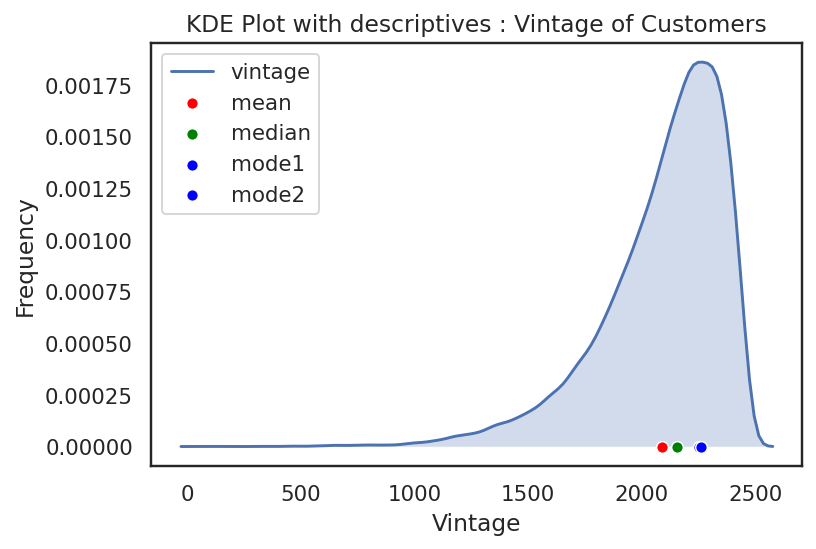

In [25]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(data['vintage'], shade = True)
sns.scatterplot( [v_mean], [0], color='red', label='mean')
sns.scatterplot( [v_median], [0], color='green', label='median')
sns.scatterplot( [v_mode[0]],[0], color='blue', label='mode1')
sns.scatterplot( [v_mode[1]],[0], color='blue', label='mode2')


plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("KDE Plot with descriptives : Vintage of Customers")
plt.show()

KDE indicates that Vinatge of Customers follow a distribution which is Left Skewed.

Mean and Median are higher than the Mode Value.

tail on the left side of the distribution is longer.

In [26]:
#explain Skewness
data['vintage'].skew()

-1.3889357082821185

Negative Skewness indicates Negatively skewed

Negatively skewed is also known as Left Skewed Distribution

In [27]:
#Kurtosis Positive
data['vintage'].kurtosis()

2.7234245375227926

Positive Kurtosis indicates Leptokurtic Distribution

Distribution is longer in compare to Normal Distribution

High presence of extreme values

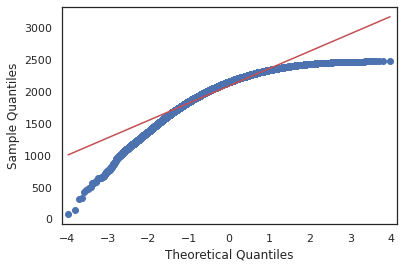

In [28]:
#qq plot explain
sm.qqplot(data['vintage'], line='s') 
py.show() 


Larger values are not as large as expected from a Normal Distribution

Smaller values are lesser in magnitude as compared to a normal distribution 